In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\Tejas\Desktop\Oasis Infobyte\New York City Airbnb Open Data\AB_NYC_2019.csv")

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.shape

(48895, 16)

In [6]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
(df.isnull().sum()/df.shape[0])*100         #checking the percentage of missing data 

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [8]:
df.describe().T #gives the ststs of all the data and (.T) is used to transpose the data i.e converting rows to columns

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


### Replacing null values with desired values

In [9]:
df['name'].replace(np.nan,'Other Hotels',inplace=True) 
df['host_name'].replace(np.nan,'Other',inplace=True)
df['reviews_per_month'].replace(np.nan,'0',inplace=True)

In [10]:
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
df.drop(['id','name','last_review'],axis=1 , inplace=True)        #dropping non-required columns

In [12]:
df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.1,1,0


In [13]:
df.isnull().sum()

host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### Let's check out top 10 host names

In [14]:
#getting value counts
df['host_name'].value_counts().iloc[:10]

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: host_name, dtype: int64

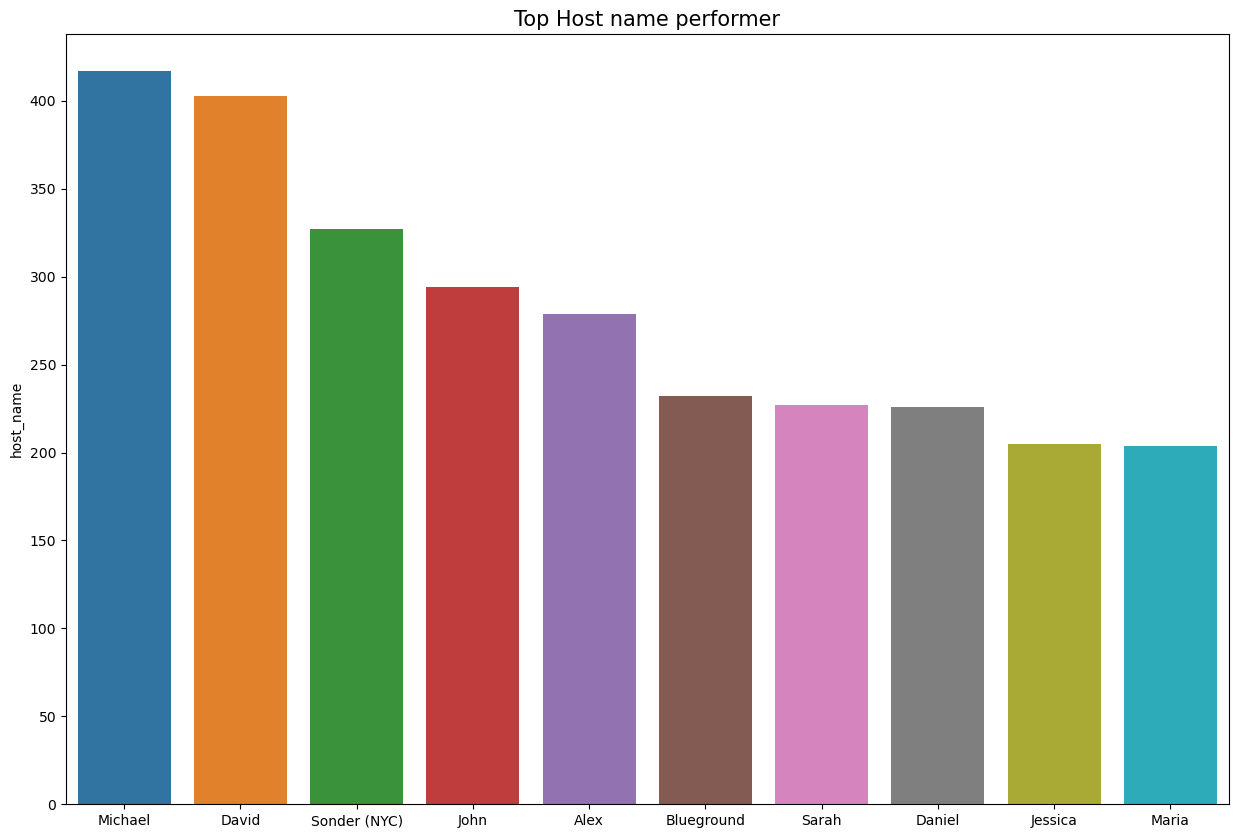

In [15]:
#plotting a bar graph

plt.figure(figsize=(15,10))
sns.barplot(data=df,x=df['host_name'].value_counts().iloc[:10].keys(),
            y=df['host_name'].value_counts().iloc[:10])
plt.title("Top Host name performer",fontsize=15)
plt.show()

### Observation
1.Host name is the name of the host who listed the hotel in the airbnb.
2.Michael has the maximum bookings under his name.

## 2.Neighbourhood_group



In [16]:
df['neighbourhood_group'].value_counts() #unique value counts i.e Manhattan attracts alot of bookings as compared to others

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

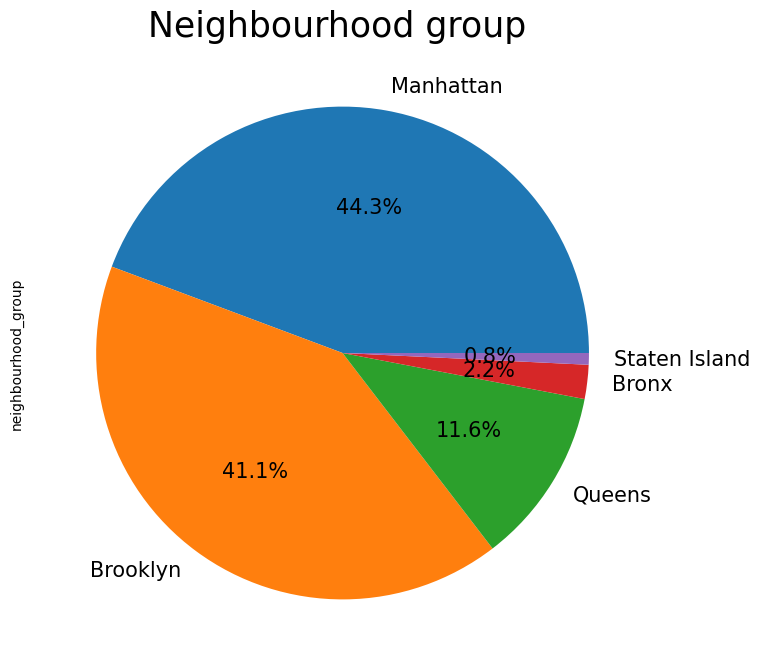

In [17]:
#Vizualizing using pie chart

df['neighbourhood_group'].value_counts().plot(kind='pie',figsize=(8,8),autopct='%1.1f%%',fontsize=15)
plt.title("Neighbourhood group ",fontsize=25)
plt.show()

### Observation
1.Manhattan group has highest number of bookings

2.and Brooklyn has tye second highest number of bookings.

## Finding the top 10 host_id

Unique ID for the host who listed the property on airbnb

In [18]:
df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.1,1,0


In [19]:
df['host_id'].value_counts().reset_index().iloc[:10]

,index,host_id
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


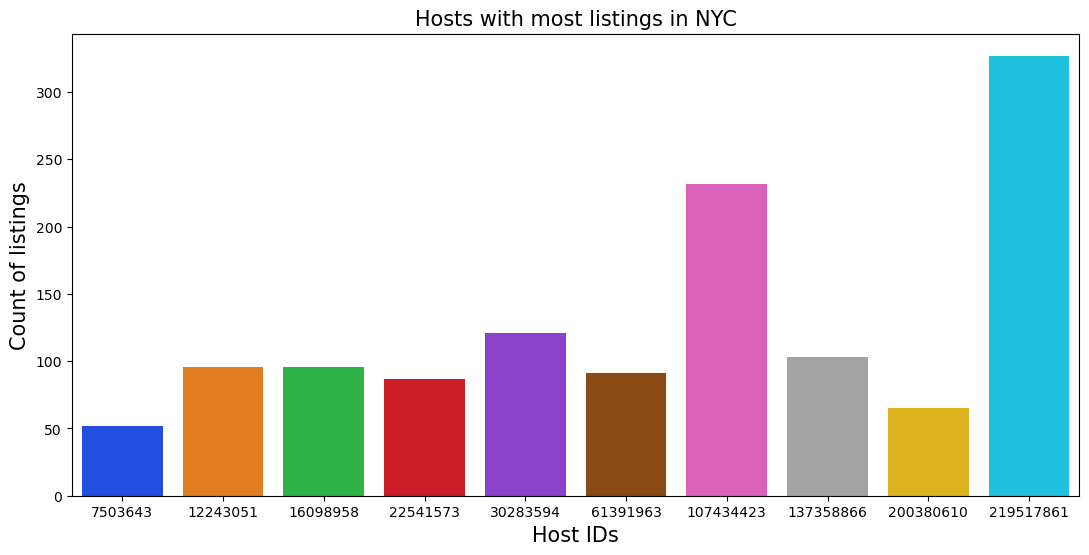

In [20]:
#plotting the bar grapgh for the above info

plt.figure(figsize=(13,6))
sns.barplot(x=df['host_id'].value_counts().iloc[:10].keys(),
            y=df['host_id'].value_counts().iloc[:10],data=df,palette='bright')
plt.title("Hosts with most listings in NYC",fontsize=15)
plt.xlabel("Host IDs",fontsize=15)
plt.ylabel("Count of listings",fontsize=15)
plt.show()

## Observation
1.We can see that there is a good distribution between top 10 hosts

2.First host has more than 300+ listings

## Neighbourhood_group according to price

In [21]:
df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.1,1,0


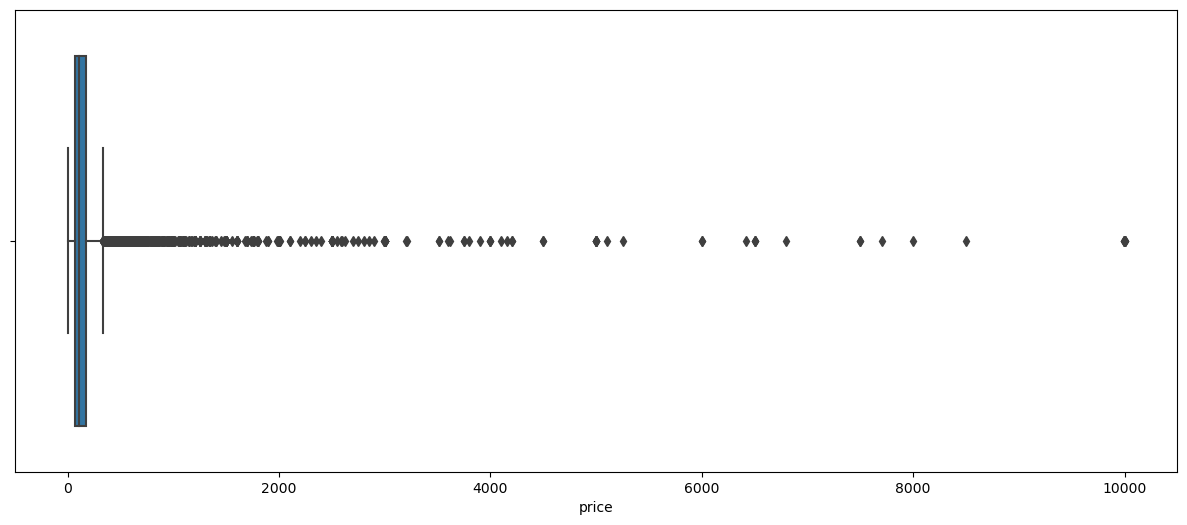

In [22]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['price'])
plt.show()

In [23]:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

## Probability density Function graph

C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


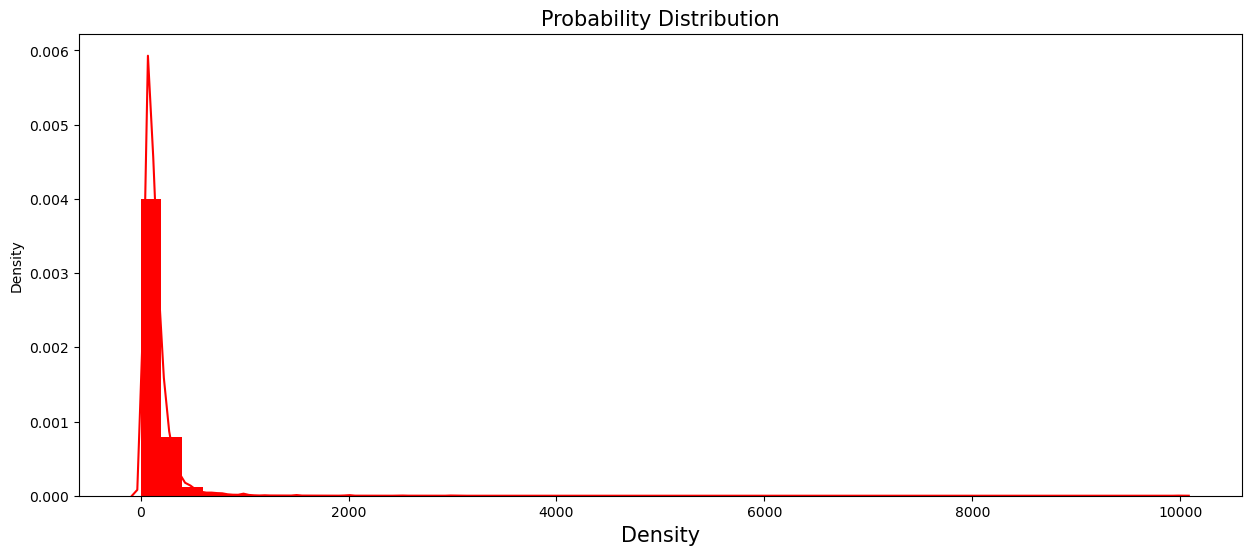

In [24]:
plt.figure(figsize=(15,6))
sns.distplot(df['price'],color='red',hist_kws={"linewidth":15,'alpha':1})
plt.title("Probability Distribution",fontsize=15)
plt.xlabel('Price',fontsize=15)
plt.xlabel('Density',fontsize=15)
plt.show()

## Calculating the interquartile range

In [25]:
# First Quartile

Q1=np.percentile(df['price'],25,interpolation='midpoint')

# Third Quartile

Q3=np.percentile(df['price'],75,interpolation='midpoint')

# Interquartile range(IQR)
IQR=Q3-Q1

print(f"The IQR is {IQR}")
print("The Minimum value is ", (Q3-(1.5*(IQR))))
print("The Maximum value is ", (Q3+(1.5*(IQR))))

The IQR is 106.0
The Minimum value is  16.0
The Maximum value is  334.0


### We can see that 99% of data lies within 334 dollars with mean 153 and median 106

In [26]:
df_new=df[df['price']<334]
df_new.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.1,1,0


In [27]:
df_new.groupby(['neighbourhood_group'])['price'].describe().T.reset_index()

neighbourhood_group,index,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,count,1070.000000,19415.000000,19501.000000,5567.000000,365.000000
1,mean,77.365421,105.699614,145.904620,88.904437,89.235616
2,std,47.110940,60.937808,70.417743,53.536041,57.700147
3,min,0.000000,0.000000,0.000000,10.000000,13.000000
4,25%,45.000000,60.000000,90.000000,50.000000,50.000000
5,50%,65.000000,90.000000,135.000000,74.000000,75.000000
6,75%,95.000000,140.000000,199.000000,108.000000,105.000000
7,max,325.000000,333.000000,333.000000,325.000000,300.000000


Text(0.5, 1.0, 'Density and distribution of prices for each neighbourhood_group')

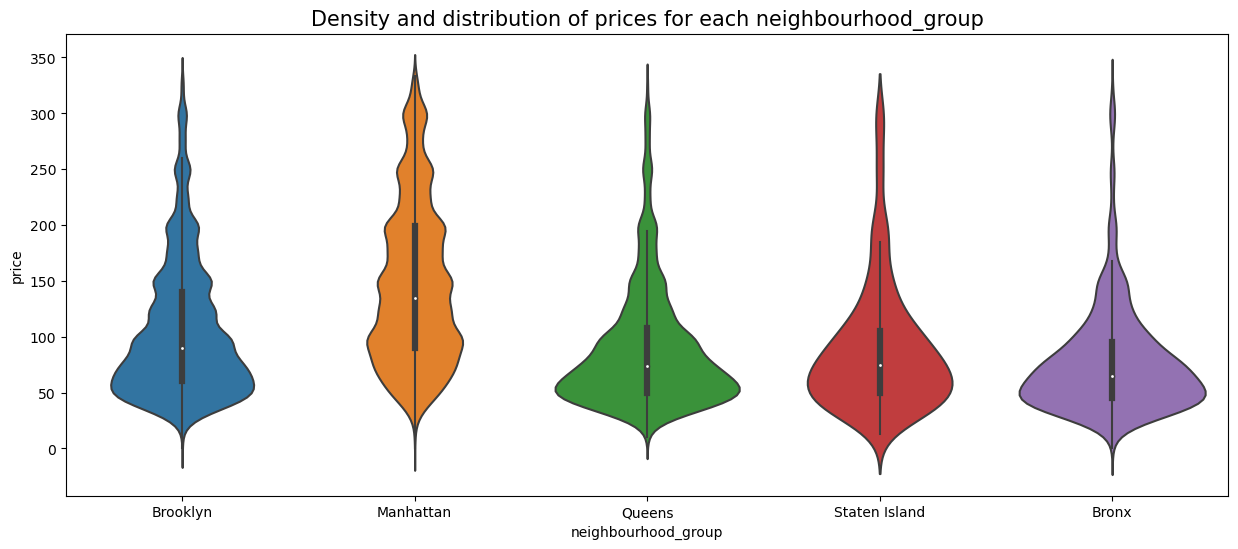

In [28]:
plt.figure(figsize=(15,6))
sns.violinplot(data=df_new,x=df_new['neighbourhood_group'],y=df_new['price'])
plt.title('Density and distribution of prices for each neighbourhood_group',fontsize=15)

C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

Text(0.5, 1.0, 'Bronx')

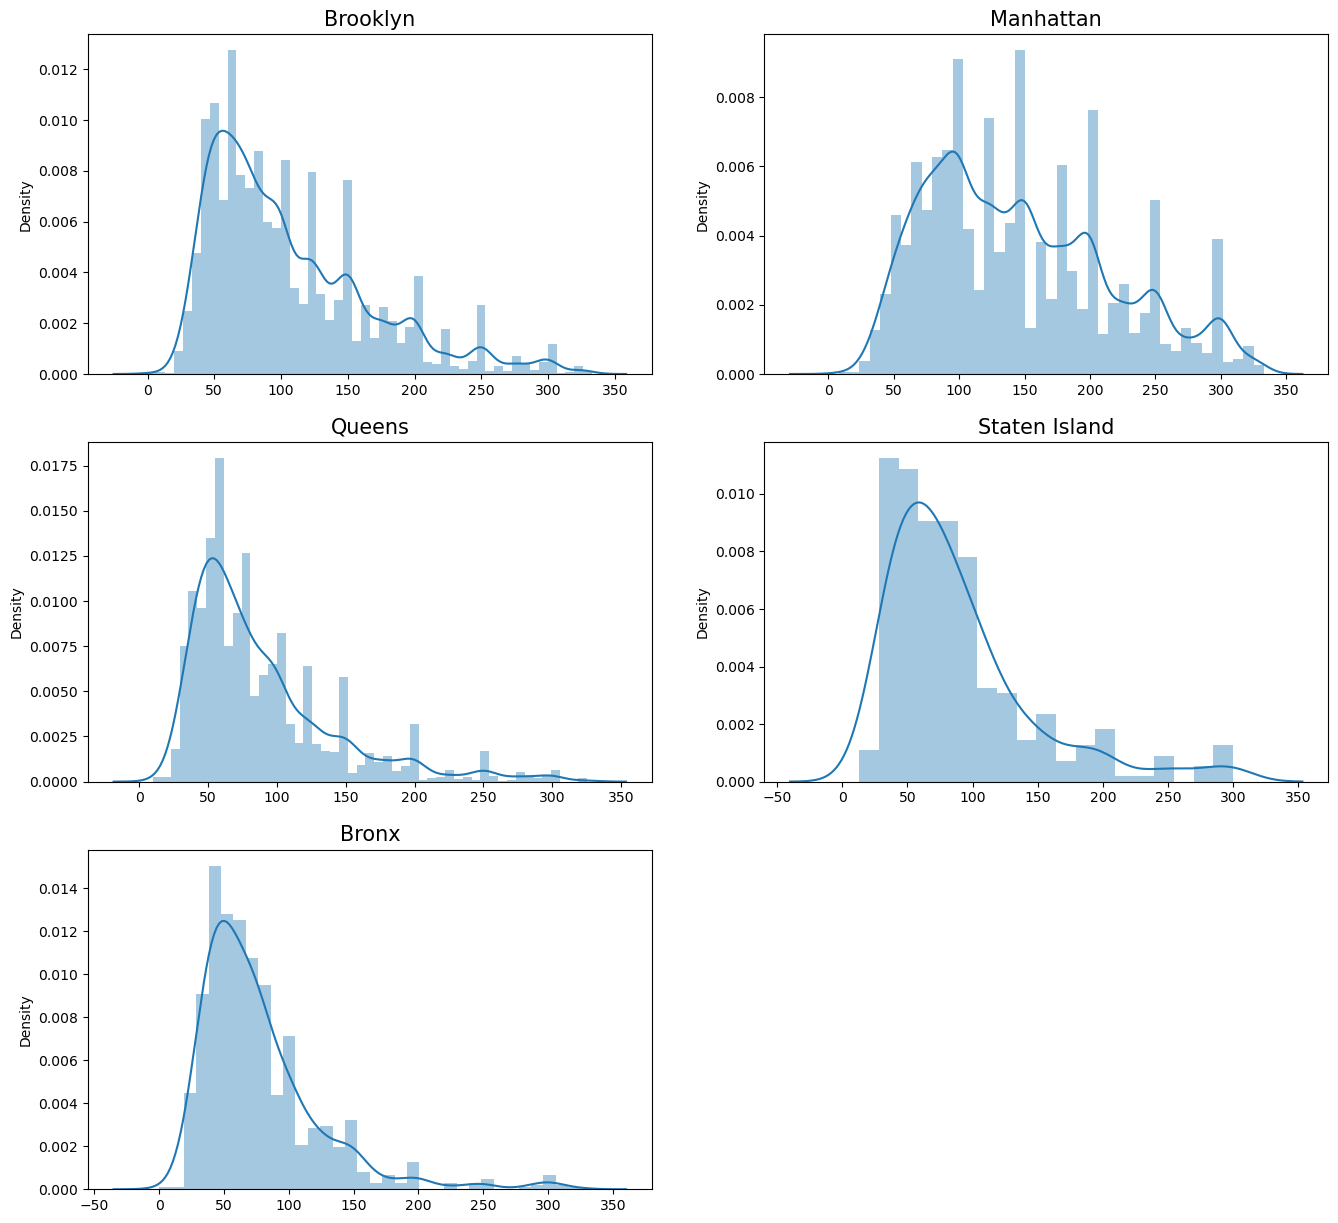

In [29]:
plt.figure(figsize=(16,15))

plt.subplot(3,2,1)
n1=df_new[df_new['neighbourhood_group']=='Brooklyn']
sns.distplot(x=n1['price'])
plt.title("Brooklyn",fontsize=15)

plt.subplot(3,2,2)
n2=df_new[df_new['neighbourhood_group']=='Manhattan']
sns.distplot(x=n2['price'])
plt.title("Manhattan",fontsize=15)

plt.subplot(3,2,3)
n3=df_new[df_new['neighbourhood_group']=='Queens']
sns.distplot(x=n3['price'])
plt.title("Queens",fontsize=15)

plt.subplot(3,2,4)
n4=df_new[df_new['neighbourhood_group']=='Staten Island']
sns.distplot(x=n4['price'])
plt.title("Staten Island",fontsize=15)

plt.subplot(3,2,5)
n5=df_new[df_new['neighbourhood_group']=='Bronx']
sns.distplot(x=n5['price'])
plt.title("Bronx",fontsize=15)

C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


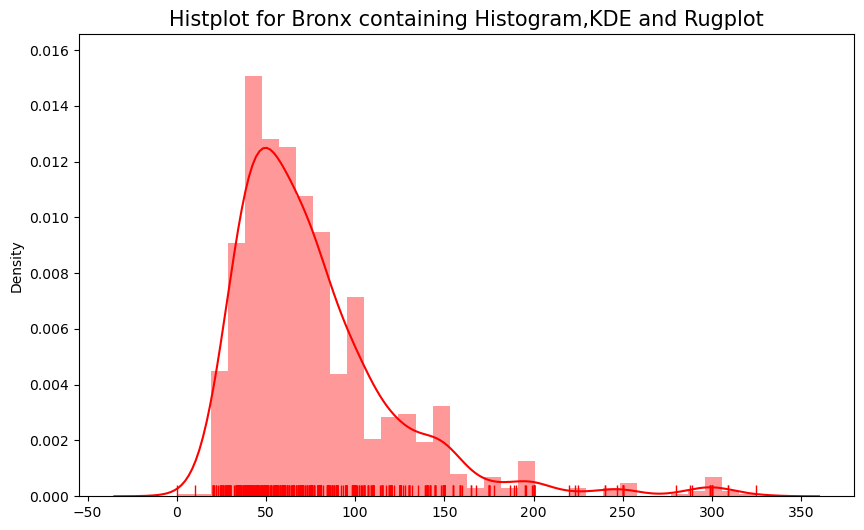

In [30]:
plt.figure(figsize=(10,6))
sns.distplot(x=n5['price'],rug=True,color='r')
plt.title("Histplot for Bronx containing Histogram,KDE and Rugplot",fontsize=15)
plt.show()

## Observation
1.Manhattan has the highest range of prices for the listings with 150 price as median observation, followed by Brooklyn with 90 per night

2.Queens and Staten Island appear to have very similar distribution, Bronx is the cheapest of all.

3.This distribution was completely expected as we know Manhattan is one of the most expensive cityin the world to live in , on the other hand Bronx appears to be having lower standaards of living

## 6. Room Type

In [31]:
df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.1,1,0


In [32]:
#Getting value counts
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

Text(0.5, 1.0, 'Room Types')

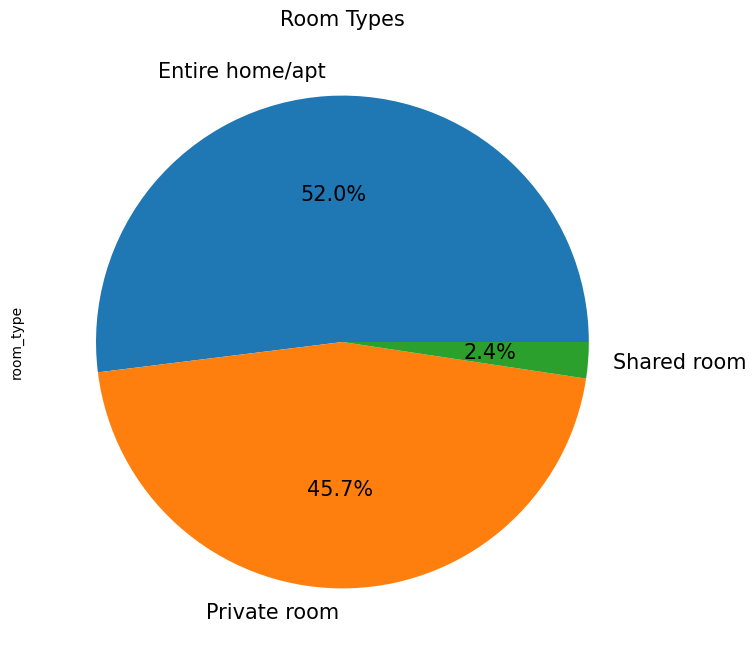

In [33]:
# Visualizing the above data

df['room_type'].value_counts().plot(kind='pie',figsize=(8,8),fontsize=15,autopct='%1.1f%%')
plt.title("Room Types",fontsize=15)
                    

## Observation 
1.Most of the people opt to rent entire home or apt which constitutes 52% 

2.Followed by Private rooms wich constitutes approx, 46%

## 7. Prices for different room type

In [34]:
df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.1,1,0


In [35]:
df.groupby(['room_type'])['price'].mean().reset_index()

,room_type,price
0,Entire home/apt,211.794246
1,Private room,89.780973
2,Shared room,70.127586


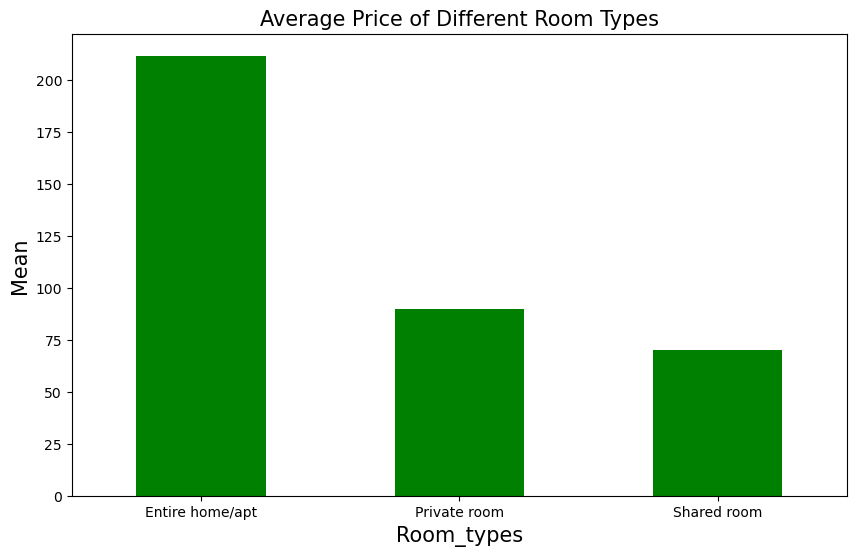

In [36]:
df.groupby(['room_type'])['price'].mean().plot(kind='bar',figsize=(10,6),color='g')
plt.xticks(rotation=360)
plt.title("Average Price of Different Room Types", fontsize=15)
plt.xlabel('Room_types',fontsize=15)
plt.ylabel('Mean',fontsize=15)
plt.show()

In [37]:
df.groupby(['room_type'])['price'].describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,25409.0,211.794246,284.041611,0.0,120.0,160.0,229.0,10000.0
Private room,22326.0,89.780973,160.205262,0.0,50.0,70.0,95.0,10000.0
Shared room,1160.0,70.127586,101.725252,0.0,33.0,45.0,75.0,1800.0


Text(0.5, 1.0, 'Shared Room')

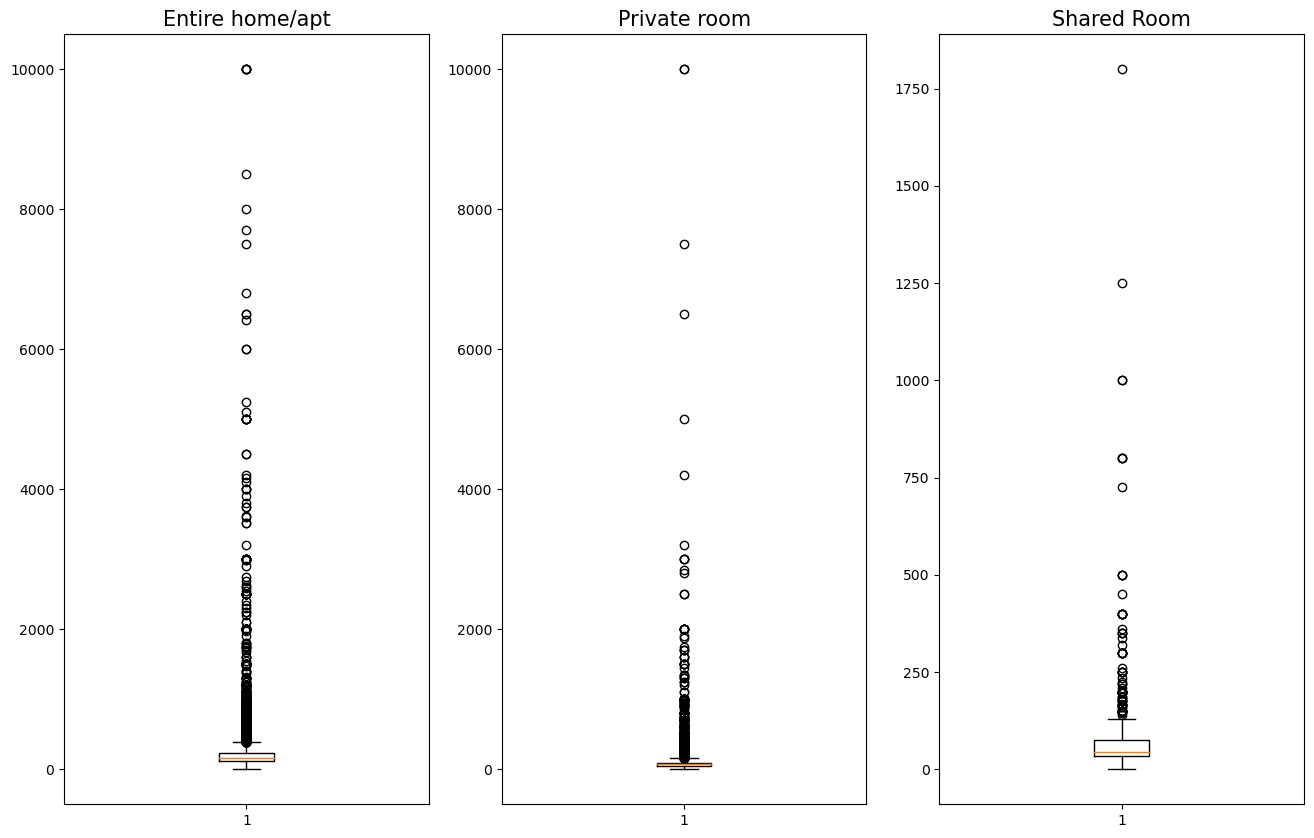

In [38]:
plt.figure(figsize=(16,10))

plt.subplot(1,3,1)
entire=df[df['room_type']=='Entire home/apt']
plt.boxplot(x=entire['price'])
plt.title("Entire home/apt",fontsize=15)

plt.subplot(1,3,2)
private=df[df['room_type']=='Private room']
plt.boxplot(x=private['price'])
plt.title("Private room",fontsize=15)

plt.subplot(1,3,3)
shared=df[df['room_type']=='Shared room']
plt.boxplot(x=shared['price'])
plt.title("Shared Room",fontsize=15)

1.From Boxplot we can conclude that entire home-apt highest price goes till 10000 dollars, and it has alot of outliers as compared to other two so the average value also goes higher.

2.Private rooms also have the outliers till 10000 dollars but as we can see the average value is approx. 90 dollars.

3.Shared rooms are the least preffere rooms wiith max value of 1800 and avg value around 70 dollars.


## 8. Minimum nights for different types of room

In [39]:
df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.1,1,0


In [40]:
round(df.groupby(['room_type'])['minimum_nights'].mean().reset_index(),0)

,room_type,minimum_nights
0,Entire home/apt,9.0
1,Private room,5.0
2,Shared room,6.0


### Plotting bar graph for the respective

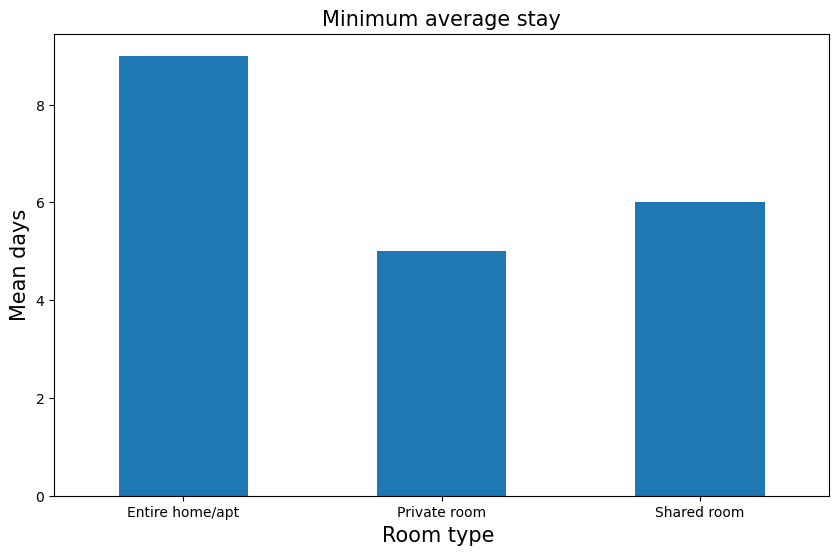

In [46]:
round(df.groupby(['room_type'])['minimum_nights'].mean(),0).plot(kind='bar',figsize=(10,6),fontsize=10) #rounding off to zero as we cant book room for a half day
plt.xticks(rotation=360)
plt.title("Minimum average stay",fontsize=15)
plt.xlabel("Room type ",fontsize=15)
plt.ylabel("Mean days",fontsize=15)
plt.show()

## Drawing boxplot to see the extreme values

Text(0.5, 1.0, 'Shared Room')

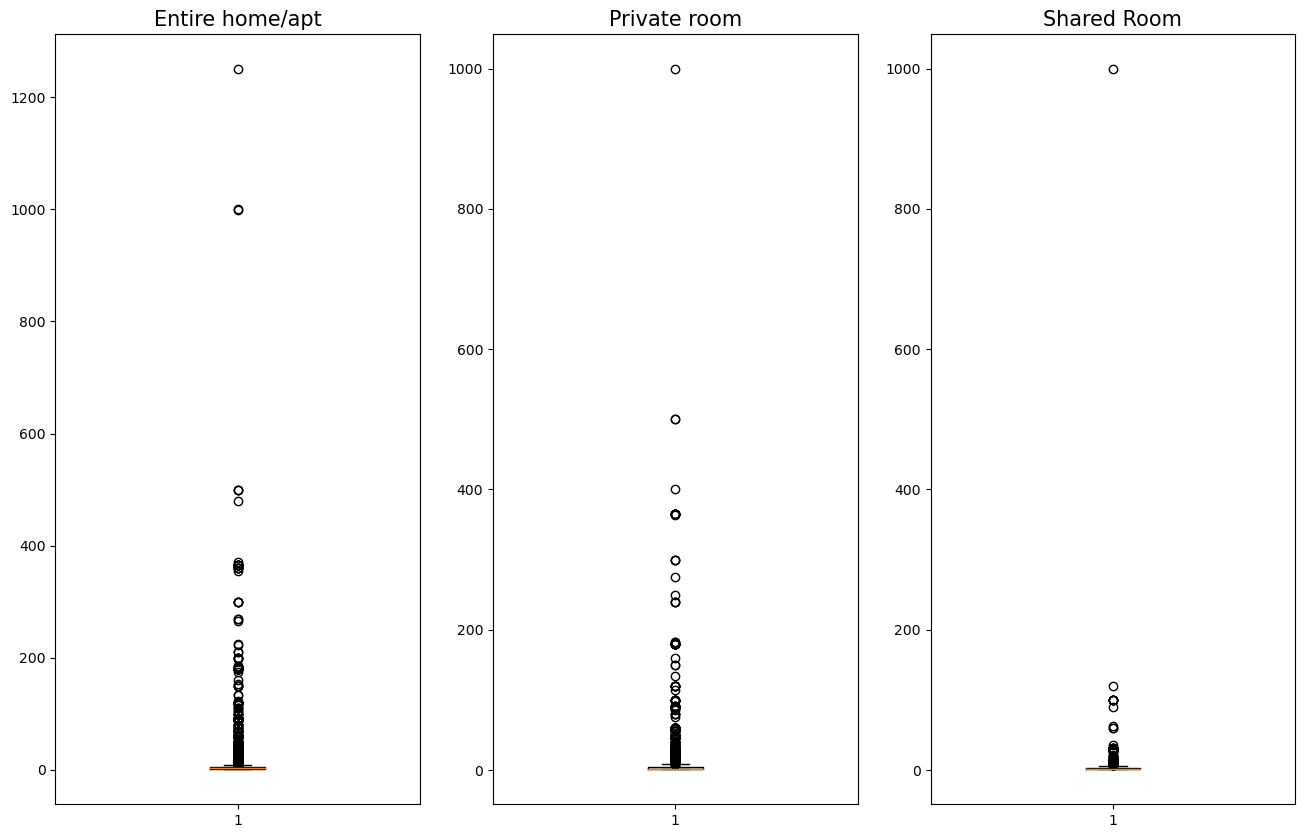

In [47]:
plt.figure(figsize=(16,10))

plt.subplot(1,3,1)
entire=df[df['room_type']=='Entire home/apt']
plt.boxplot(x=entire['minimum_nights'])
plt.title("Entire home/apt",fontsize=15)

plt.subplot(1,3,2)
private=df[df['room_type']=='Private room']
plt.boxplot(x=private['minimum_nights'])
plt.title("Private room",fontsize=15)

plt.subplot(1,3,3)
shared=df[df['room_type']=='Shared room']
plt.boxplot(x=shared['minimum_nights'])
plt.title("Shared Room",fontsize=15)

### Observation

1.Minumum days to stay in entire home/apt are 9 though it has the highest price.

2.Minumum days to stay in entire Private room are 5.

3.Minumum days to stay in entire shared room are 6.

### Availability

In [48]:
df['availability_365'].value_counts().iloc[:10].sort_index()

0      17533
1        408
2        270
3        306
5        340
89       361
90       290
179      301
364      491
365     1295
Name: availability_365, dtype: int64

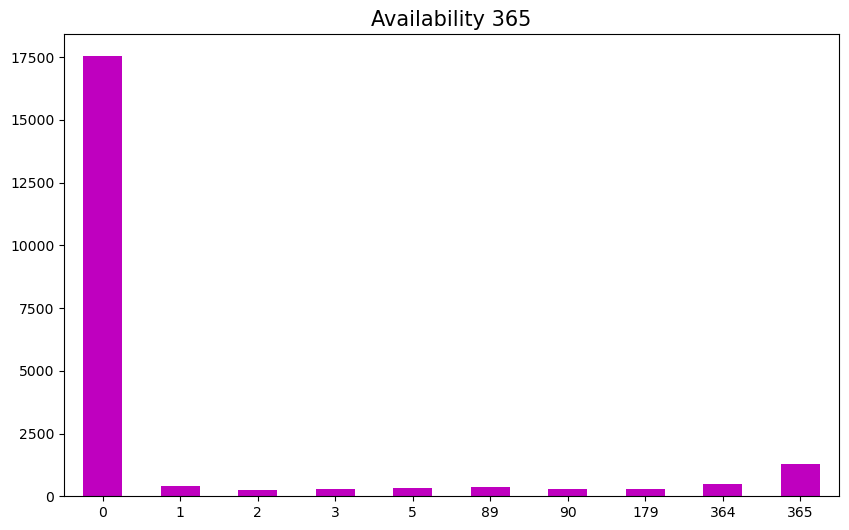

In [50]:
df['availability_365'].value_counts().iloc[:10].sort_index().plot(kind='bar',figsize=(10,6),color='m',fontsize=10)
plt.xticks(rotation=360)
plt.title("Availability 365",fontsize=15)
plt.show()

### Neighbourhood group with respect to room type

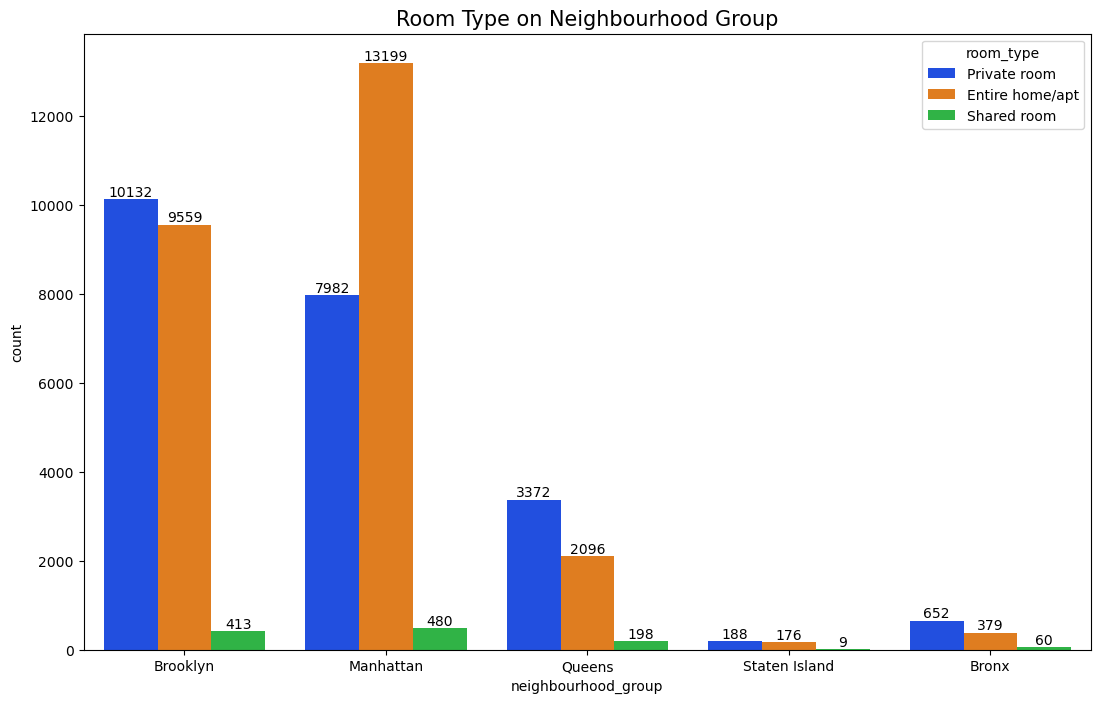

In [59]:
plt.figure(figsize=(13,8))
ax = sns.countplot(x='neighbourhood_group', hue='room_type', data=df, palette="bright")
plt.title("Room Type on Neighbourhood Group",fontsize=15)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.show()

### Observation

1. Manhattan has most number of entire home/apt amongst all groups

2.Brooklyn has most private rooms

3.Brooklyn and Manhattan almost same number of shared rooms


### Finding top 10 and bottom 10 of the neighbourhoods

In [65]:
print(df['neighbourhood'].value_counts().iloc[:10],'\n') 
print(df['neighbourhood'].value_counts().tail(10))

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64 

Howland Hook       2
Lighthouse Hill    2
Silver Lake        2
West Farms         2
Woodrow            1
Fort Wadsworth     1
Richmondtown       1
New Dorp           1
Rossville          1
Willowbrook        1
Name: neighbourhood, dtype: int64


Text(0.5, 1.0, 'Bottom 10 Neighbourhoods')

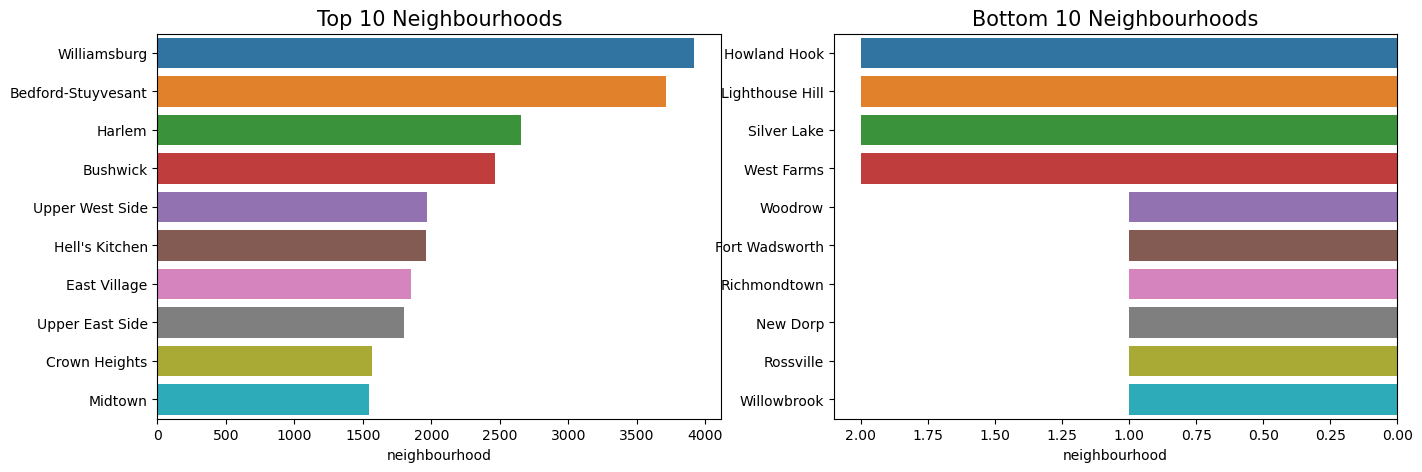

In [85]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.barplot(data=df,y=df['neighbourhood'].value_counts().iloc[:10].keys(),
            x=df['neighbourhood'].value_counts().iloc[:10])
plt.title("Top 10 Neighbourhoods", fontsize=15)

plt.subplot(1,2,2)
sns.barplot(data=df,y=df['neighbourhood'].value_counts().tail(10).keys(),
            x=df['neighbourhood'].value_counts().tail(10)).invert_xaxis()
plt.title("Bottom 10 Neighbourhoods", fontsize=15)

## Observation

1. Williamsburg and Bedford - Stuyvesant are the two highest Neighbourhood
2. willowbrook, Rossville, New Dorp, Richmondtown and woodrow are the least of the neighbourhood

# Conclusion

This Airbnb ('AB NYC 2019') dataset for the 2019 year appeared to be a very rich dataset with a variety of columns that allowed us to dive deep into each significant column presented.

To begin, firstly, we identified the data of top ten host id and we figured out that top host ID has 327 listings.

Secondly, we take "Neighbourhood Group", and we found that Airbnb listings in New York City are concentrated in five neighborhoods: "Brooklyn" "Manhattan," "Queens," "Staten Island," and "Bronx". Moreover, we also learned from this chart that "Manhattan" and "Brooklyn" have the most hotel properties. Then, we found that Manhattan is the most expensive as the rental charges are more evenly distributed across all the price ranges, median price in Manhattan is approx $150 thats around double the median price of Bronx and the distributions in Queens and Staten Island appear to be very similar, while the Bronx appears to be the cheapest of the three.

Thirdly, we take the data of "room type" and figured out that it is devided into three subcategaries and we can observe that the Entire Home/Apartment has the

highest share, followed by the Private Room, and the least preferred is Shared Room. Futhermore, entire Home/Apartment is listed most near Manhattan,

while Private Rooms and Apartments Near Brooklyn are Nearly equal.

Fourthly, we put our latitude and longitude columns to good use by creating a geographical map of Newyork city which represents the location of all the areas with their latitude and longtitude. In other map is Color-coded for listing price of room as per the location.

In addition, we returned to the first column "name" and found out the words from the hotel names, as well as the count for the most frequently used words by hosts. Hosts prefer to use Private rooms, brooklyn,central park,modern,nyc and Beautiful these words in their listing to seek customer attention.

Finally, we looked for the listings with the "most reviews". Count the rating of top ten reviewed hotels, and found out The top 10 most reviewed listings on Airbnb for NYC have an average price of $65 per night, with the majority of them under 50, and 9/10 of them are "Private Room" types, with the top reviewed listing having 629 reviews